In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [2]:
from itertools import chain
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte'% kind)
    
    with open(labels_path,'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    

    with open(images_path,'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels),28,28)    

    return images, labels

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2
import numpy as np


encoding_dim = 6  

input_img = Input(shape=(784,))
d = Dense(256, activation='selu')(input_img)
d = Dense(128, activation='selu')(d)
encoded = Dense(encoding_dim, activation='selu', kernel_regularizer=l2(0.01))(d)
d = Dense(128, activation='selu')(encoded)
d = Dense(256, activation='selu')(d)
decoded = Dense(784, activation='sigmoid')(d)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)

decoder = Model(encoded_input, deco)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


W1114 00:17:58.018662 20424 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1114 00:17:58.241126 20424 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1114 00:17:58.473431 20424 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1114 00:17:58.512327 20424 deprecation.py:323] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
U

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               201488    
Total para

In [4]:
# !pip install gmm_mml

In [5]:
import numpy as np
import pandas as pd
from gmm_mml import GmmMml
from keras.callbacks import TensorBoard

x_train, y_train = load_mnist('fashion/data', kind='train')
x_test, y_test = load_mnist('fashion/data', kind='t10k')


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=4096,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

(60000, 784)
(10000, 784)


W1114 00:18:16.062962 20424 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples


W1114 00:18:17.088620 20424 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1114 00:18:17.089613 20424 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/10
 - 7s - loss: 0.6821 - val_loss: 0.5641
Epoch 2/10
 - 6s - loss: 0.5188 - val_loss: 0.4721
Epoch 3/10
 - 6s - loss: 0.4479 - val_loss: 0.4285
Epoch 4/10
 - 5s - loss: 0.4147 - val_loss: 0.4037
Epoch 5/10
 - 5s - loss: 0.3934 - val_loss: 0.3854
Epoch 6/10
 - 5s - loss: 0.3772 - val_loss: 0.3717
Epoch 7/10
 - 5s - loss: 0.3653 - val_loss: 0.3616
Epoch 8/10
 - 6s - loss: 0.3561 - val_loss: 0.3535
Epoch 9/10
 - 5s - loss: 0.3485 - val_loss: 0.3465
Epoch 10/10
 - 5s - loss: 0.3421 - val_loss: 0.3409


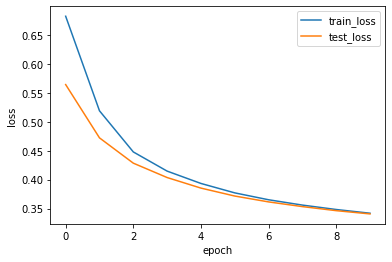

In [6]:
def show_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'test_loss'], loc='best')
    plt.show()
show_history(history)

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)

clf=GmmMml()

a = clf.fit(encoded_imgs)

decoded_imgs = decoder.predict(clf.sample(32))

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10).fit(encoded_imgs)
labels = gmm.predict(encoded_imgs)
labels
# decoded_imgs = decoder.predict(labels)

array([0, 2, 9, ..., 1, 9, 0], dtype=int64)

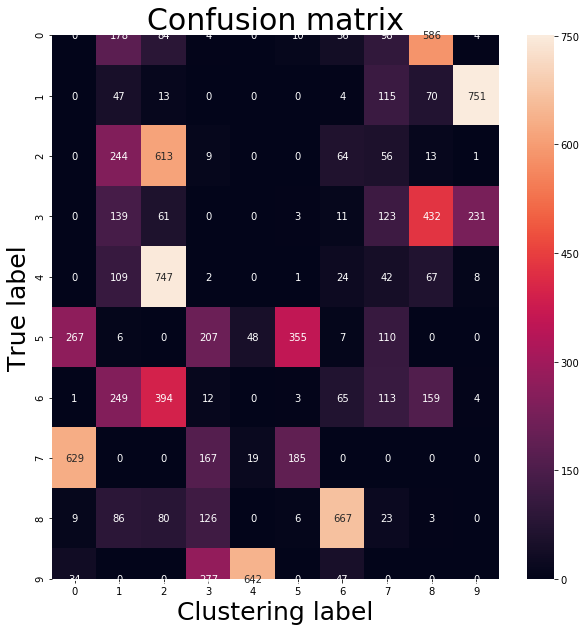

In [14]:
# Observe and compare clustering result with actual label using confusion matrix
cm = confusion_matrix(y_test, labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

NameError: name 'decoded_imgs' is not defined

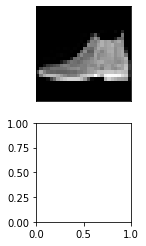

In [11]:
# use Matplotlib (don't ask)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
for c in range(0,clf.bestmu.shape[0]):
    samples=[]
    for i in range(0,11):
        samples.append(np.random.multivariate_normal(clf.bestmu[c],np.swapaxes(clf.bestcov,0,2)[c]))
    samples=np.array(samples)
    decoded_imgs = decoder.predict(samples)
        
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


In [ ]:
# Observe and compare clustering result with actual label using confusion matrix
cm = confusion_matrix(y_test, encoded_imgs)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()